In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [2]:
data = pd.read_csv('principal_components_with_labels.csv')

In [3]:
print(len(data))

31106


In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.1, random_state=42)

In [5]:
print("Train data size: ", len(train_data))
print("Test data size: ", len(test_data))

Train data size:  27995
Test data size:  3111


## Linear SVM

In [34]:
clf_linear = svm.SVC(kernel="linear", C=5, probability=True, verbose=True)
clf_linear.fit(train_data.values, train_labels.values)

[LibSVM]

SVC(C=5, kernel='linear', probability=True, verbose=True)

In [35]:
y_train_pred = cross_val_predict(clf_linear, train_data, train_labels, cv=5)

[LibSVM]

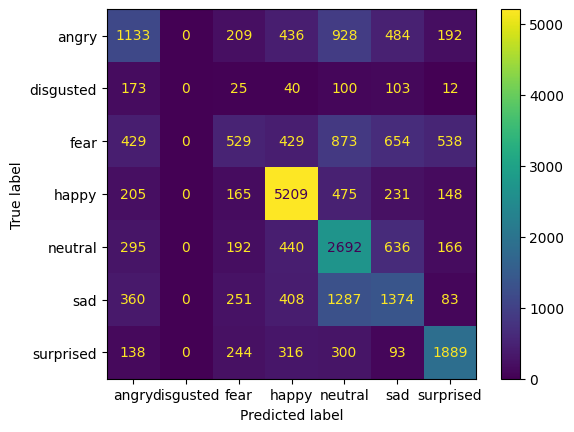

In [23]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_linear.classes_).plot()

In [20]:
print(precision_score(train_labels, y_train_pred, average='weighted'))
print(recall_score(train_labels, y_train_pred, average='weighted'))

0.49150562597263564
0.5154316026362321


c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [15]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, verbose=True, n_jobs=-1)
forest_clf.fit(train_data.values, train_labels.values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=True)

In [16]:
y_train_pred = cross_val_predict(forest_clf, train_data, train_labels, cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n

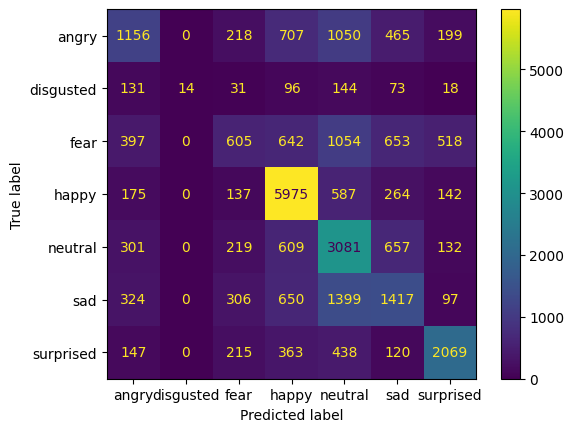

In [17]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=forest_clf.classes_).plot()

In [18]:
print(precision_score(train_labels, y_train_pred, average='weighted'))
print(recall_score(train_labels, y_train_pred, average='weighted'))

0.5049656408212022
0.5114127522771924


### Exporting

In [19]:
import pickle
pickle.dump(forest_clf, open("emotion_model.pkl", "wb"))